In [ ]:
!pip install imutils

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt #for visualizing the data
import argparse #parse command-line arguments
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator #real-time data augmentation during training.
from tensorflow.keras.applications import VGG16 #pre-trained deep learning model
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout #prevents overfitting
from tensorflow.keras.layers import Flatten #1D array
from tensorflow.keras.layers import Dense #fully connected neural network
from tensorflow.keras.layers import Input #define input shape of the network
from tensorflow.keras.models import Model #define a custom model architecture
from tensorflow.keras.optimizers import Adam # for gardient-based optimization during model training
from tensorflow.keras.utils import to_categorical #convert class labels to one-hot encoded vectors
from sklearn.preprocessing import LabelBinarizer #for training and evaluation
from sklearn.model_selection import train_test_split #split dataset into training and validation
import numpy as np

In [ ]:
dataset = "/content/sample_data/covid19-chest-xray-image-dataset"

In [ ]:
args={}
args["dataset"]=dataset

In [ ]:
import numpy as np
import cv2
iPaths = list(paths.list_images(args["dataset"]))  #image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]   #split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  #Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0 #input data is properly scaled
labels = np.array(labels)

In [ ]:
import os

Data_Dir = "/content/sample_data/covid19-chest-xray-image-dataset/dataset"

if os.path.exists(Data_Dir):
    print(os.listdir(Data_Dir))
else:
    print("Data directory does not exist!")

['normal', 'covid', '.ipynb_checkpoints']


In [ ]:
import os

Data_Dir = "/content/sample_data/covid19-chest-xray-image-dataset/dataset"
Cimages = os.listdir(os.path.join(Data_Dir, "covid"))
Nimages = os.listdir(os.path.join(Data_Dir, "normal"))

Normal Chest X-ray Vs Covid-19 Chest X-ray


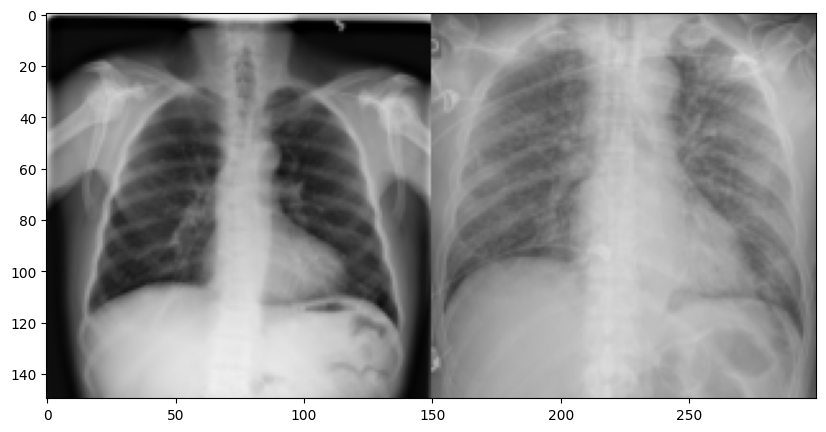

Normal Chest X-ray Vs Covid-19 Chest X-ray


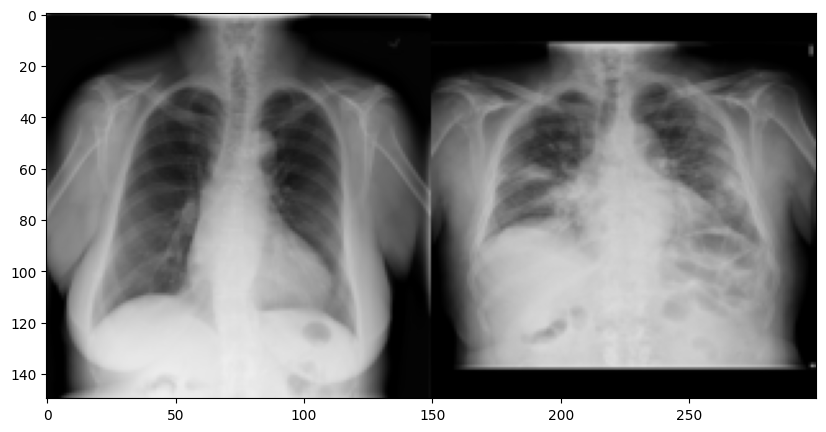

Normal Chest X-ray Vs Covid-19 Chest X-ray


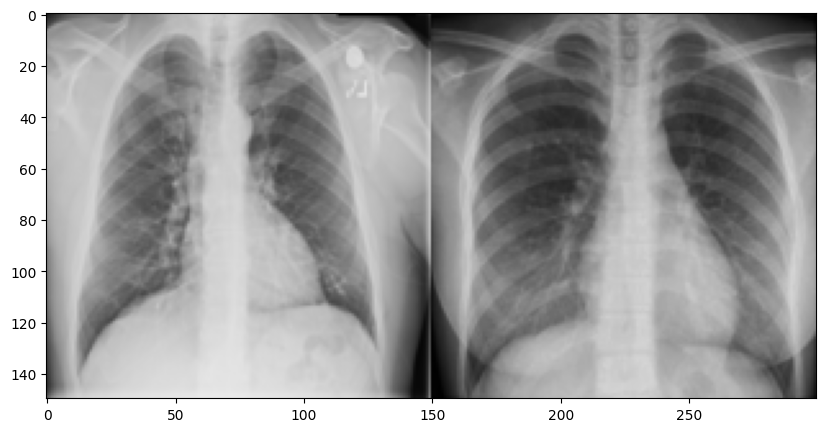

Normal Chest X-ray Vs Covid-19 Chest X-ray


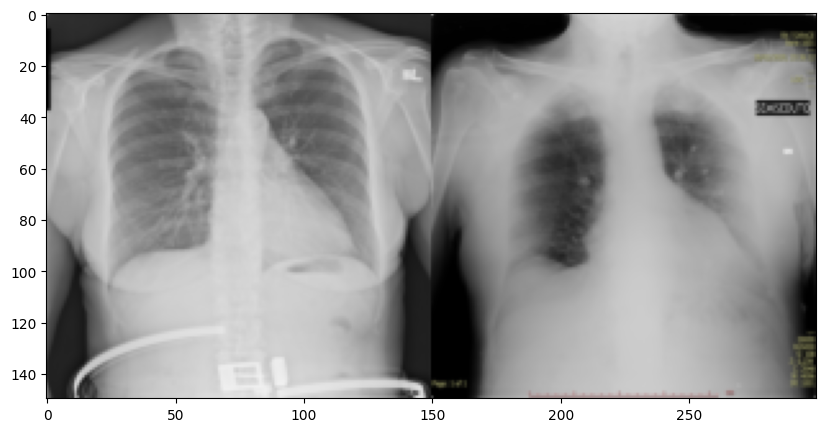

Normal Chest X-ray Vs Covid-19 Chest X-ray


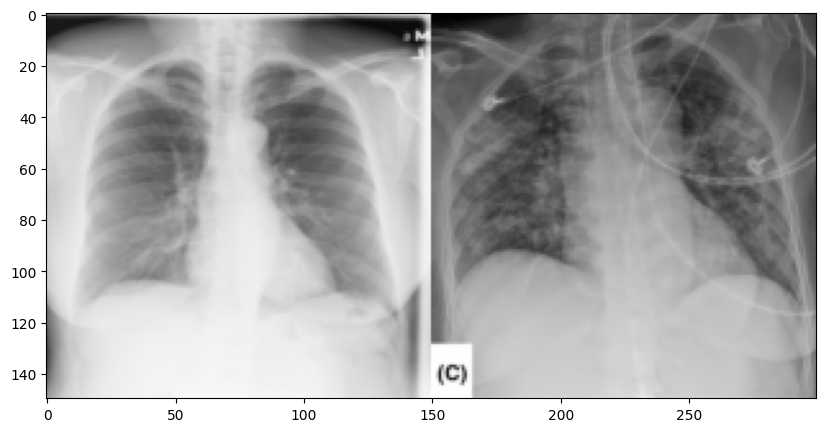

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np

def plotter(i):
    try:
        normal = cv2.imread(Data_Dir + "/normal/" + Nimages[i])
        if normal is None:
            raise ValueError("Failed to read normal image:", Nimages[i])
        normal = skimage.transform.resize(normal, (150, 150, 3))

        coronavirus = cv2.imread(Data_Dir + "/covid/" + Cimages[i])
        if coronavirus is None:
            raise ValueError("Failed to read coronavirus image:", Cimages[i])
        coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3), mode='reflect')

        pair = np.concatenate((normal, coronavirus), axis=1)

        print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
        plt.figure(figsize=(10, 5))
        plt.imshow(pair)
        plt.show()

    except Exception as e:
        print("Error:", str(e))

for i in range(0, 5):
    plotter(i)

In [ ]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")


[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
base_model = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
model = base_model.output
model = AveragePooling2D(pool_size=(4, 4))(model)
model = Flatten(name="flatten")(model)
model = Dense(64, activation="relu")(model)
model = Dropout(0.5)(model)
model = Dense(2, activation="sigmoid")(model)
full_model = Model(inputs=base_model.input, outputs=model)
for layer in full_model.layers:
   layer.trainable = False
full_model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
)

In [ ]:
# Data augmentation
train_aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((320, 224, 224, 3), (80, 224, 224, 3), (320, 2), (80, 2))

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


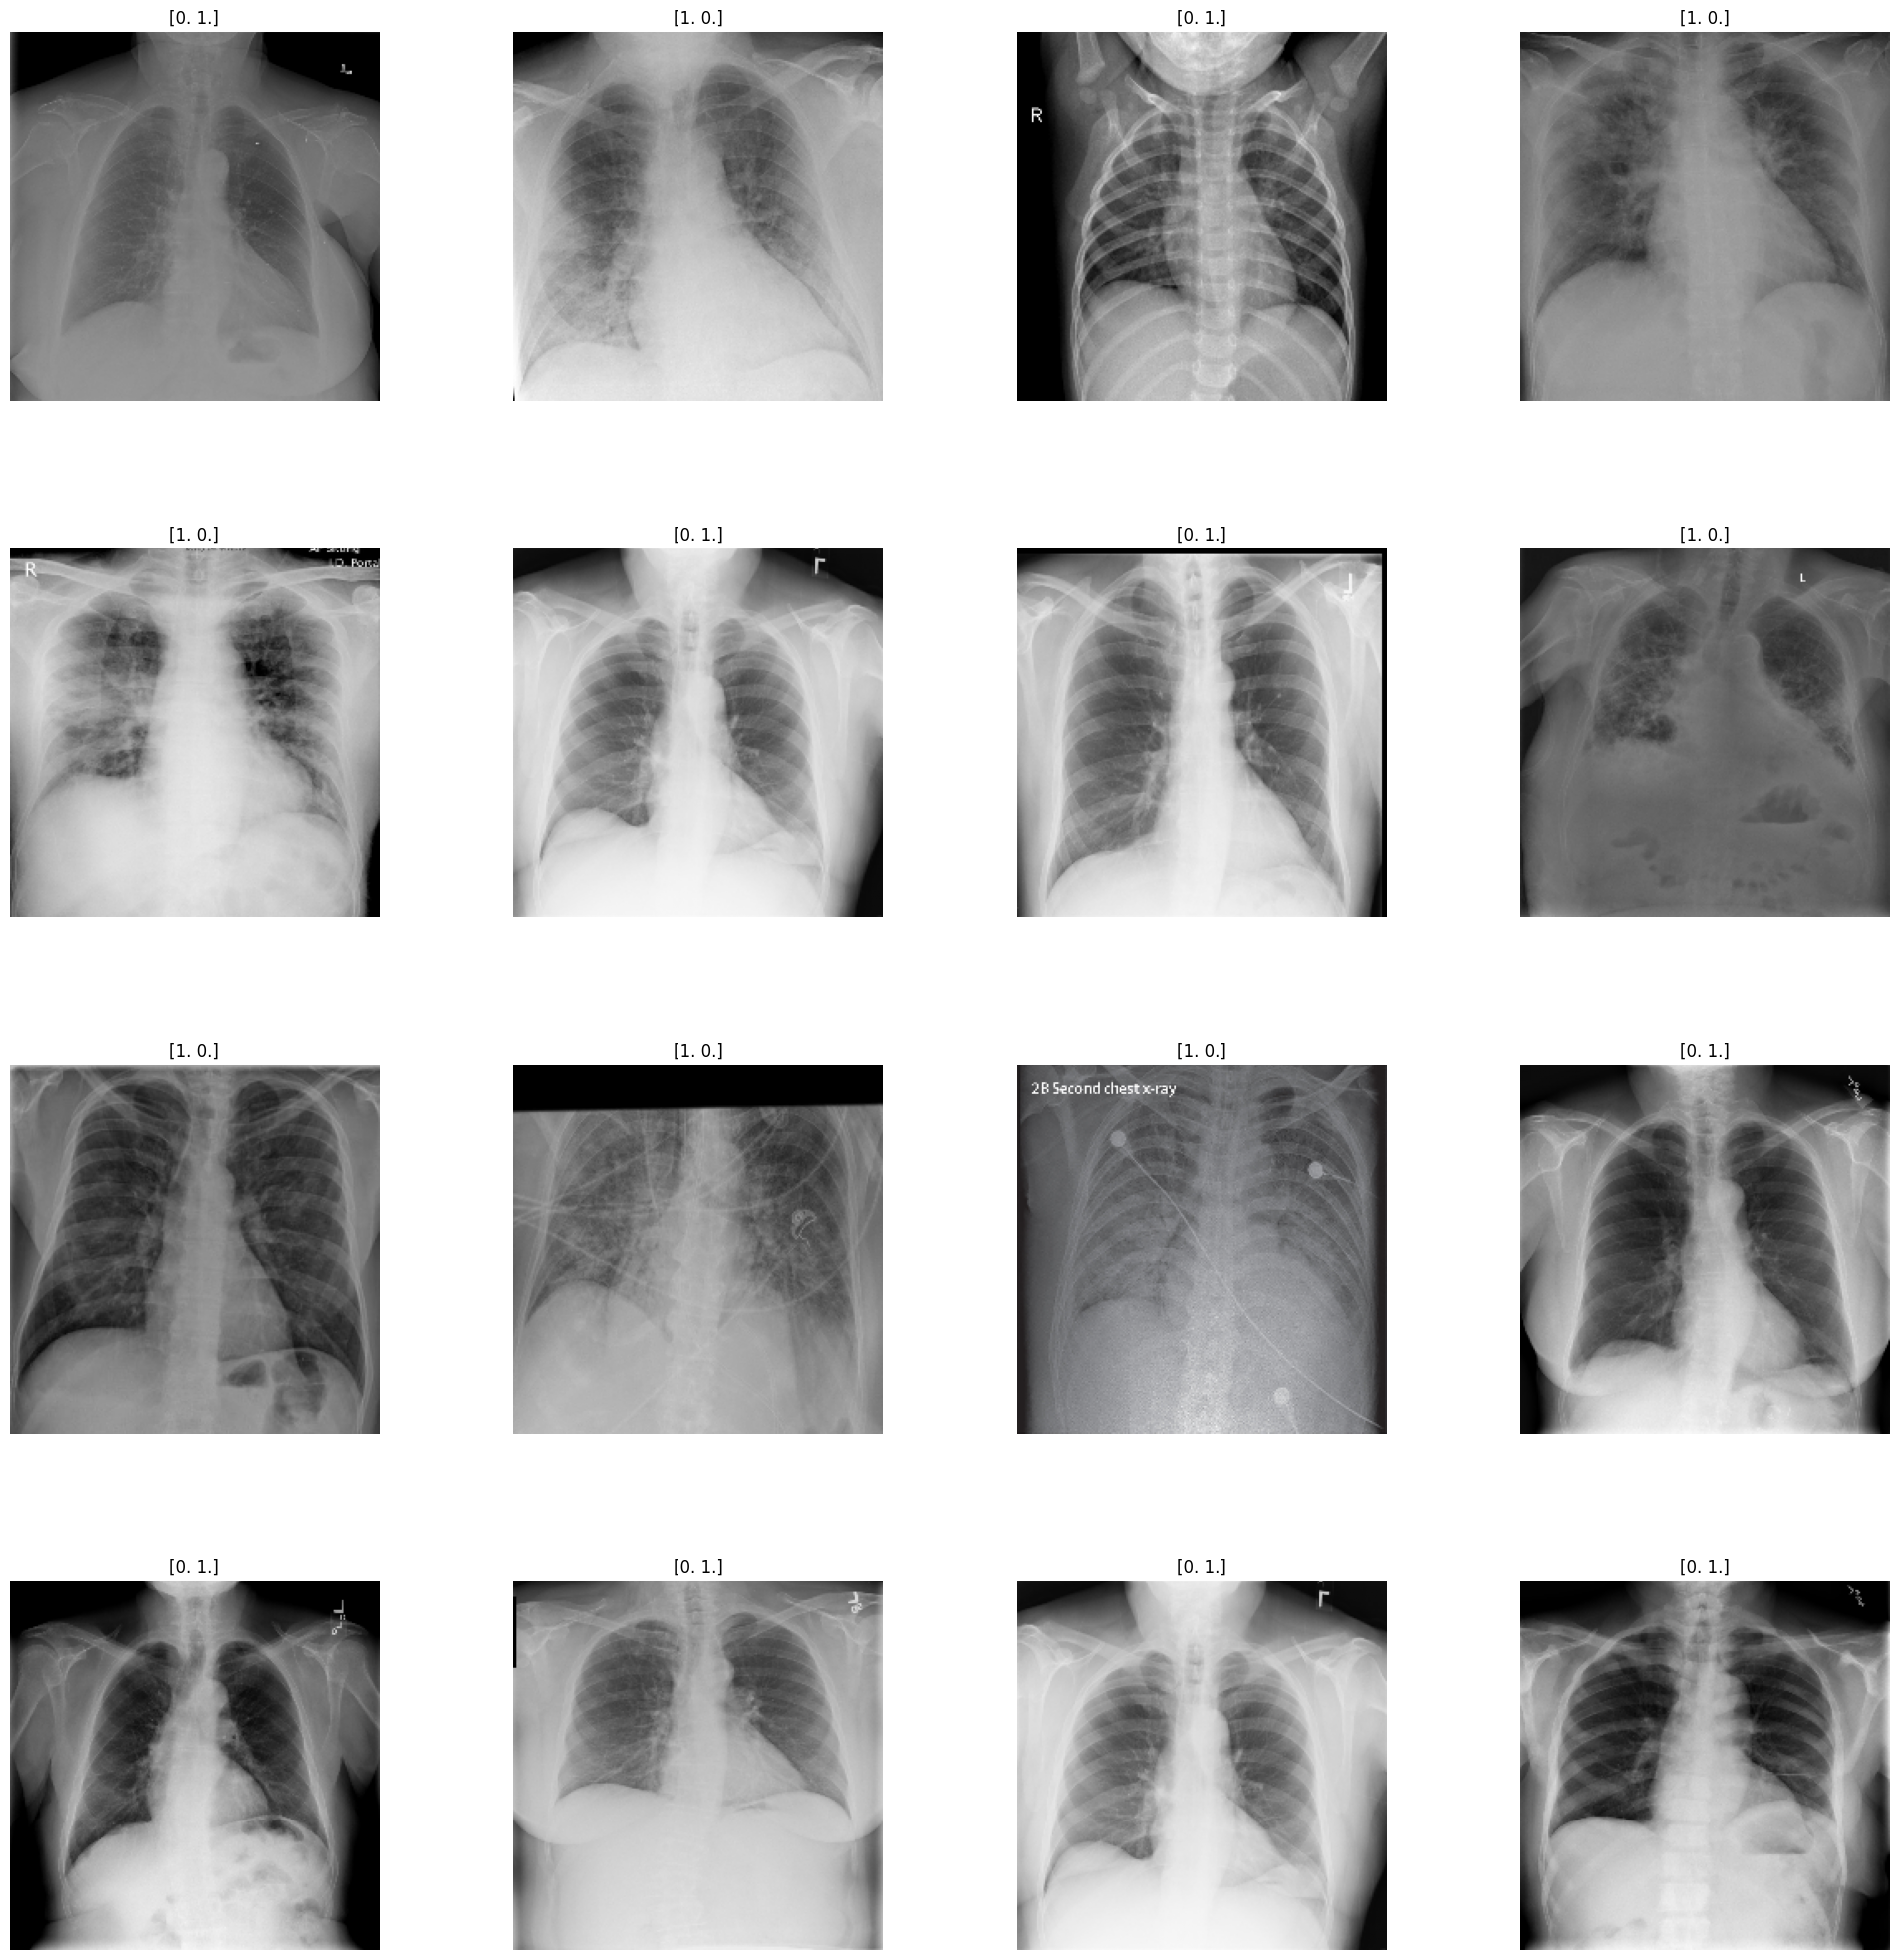

In [ ]:
#This code uses Matplotlib to plot a grid of images from the training data (X_train) along with their corresponding labels (Y_train). The images are randomly selected from the training set and displayed in a grid layout.
W_grid = 4 # width
L_grid = 4 # length
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25)) # subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [ ]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
history = full_model.fit(train_aug.flow(X_train, Y_train, batch_size=32),
                    validation_data=(X_test, Y_test),
                    validation_steps=len(X_test) / 32,
                    steps_per_epoch=len(X_train) / 32,
                    epochs=100)

Epoch 1/100
10/10 [==============================] - 290s 29s/step - loss: 0.8672 - accuracy: 0.5219 - val_loss: 0.8974 - val_accuracy: 0.4500
Epoch 2/100
10/10 [==============================] - 281s 29s/step - loss: 0.9247 - accuracy: 0.4906 - val_loss: 0.8974 - val_accuracy: 0.4500
Epoch 3/100
10/10 [==============================] - 242s 25s/step - loss: 0.8681 - accuracy: 0.4875 - val_loss: 0.8974 - val_accuracy: 0.4500
Epoch 4/100
10/10 [==============================] - 273s 28s/step - loss: 0.9544 - accuracy: 0.5000 - val_loss: 0.8974 - val_accuracy: 0.4500
Epoch 5/100
10/10 [==============================] - 236s 24s/step - loss: 0.9039 - accuracy: 0.5094 - val_loss: 0.8974 - val_accuracy: 0.4500
Epoch 6/100
10/10 [==============================] - 272s 28s/step - loss: 0.8885 - accuracy: 0.5125 - val_loss: 0.8974 - val_accuracy: 0.4500
Epoch 7/100
10/10 [==============================] - 273s 28s/step - loss: 0.8772 - accuracy: 0.5031 - val_loss: 0.8974 - val_accuracy: 0.4500

KeyboardInterrupt: ignored

3/3 [==============================] - 21s 6s/step


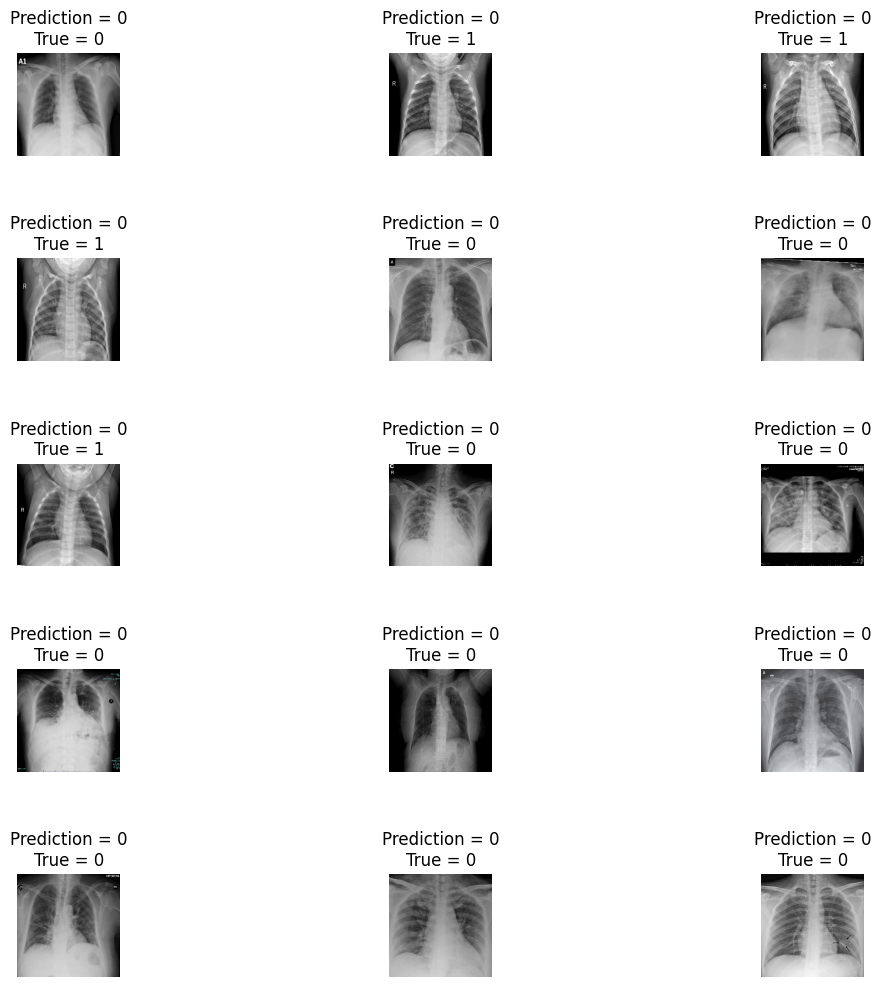

In [ ]:
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
y_pred = full_model.predict(X_test, batch_size=32)
for i in np.arange(0, min(L * W, len(X_test))):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)

In [ ]:
# Evaluate the model
y_pred = full_model.predict(X_test, batch_size=32)
y_pred = np.argmax(y_pred, axis=1)

3/3 [==============================] - 12s 4s/step
              precision    recall  f1-score   support

       covid       0.74      1.00      0.85        14
      normal       0.00      0.00      0.00         5

    accuracy                           0.74        19
   macro avg       0.37      0.50      0.42        19
weighted avg       0.54      0.74      0.63        19



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(Y_test.argmax(axis=1), y_pred, target_names=LB.classes_))
print("Accuracy:", accuracy_score(Y_test.argmax(axis=1), y_pred))

In [ ]:
# Compute confusion matrix and additional performance metrics
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

[[14  0]
 [ 5  0]]
acc: 0.7368
sensitivity: 1.0000
specificity: 0.0000


In [ ]:
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.4f}".format(acc))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))

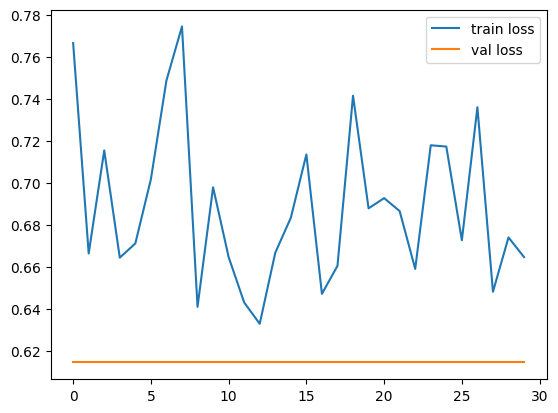

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

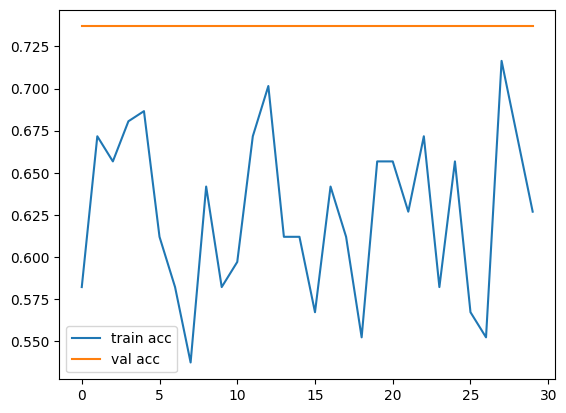

In [ ]:
# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
full_model.save('Covid_model.h5')

1/1 [==============================] - 1s 725ms/step
Prediction: Corona


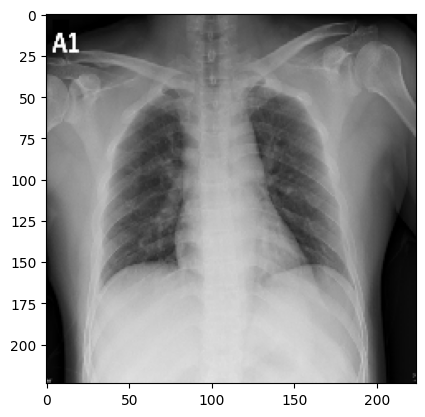

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input

img = tf.keras.preprocessing.image.load_img('/content/sample_data/covid19-chest-xray-image-dataset/dataset/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png', target_size=(224, 224))
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == [1]:
    print('Prediction: Normal')
else:
    print('Prediction: Corona')

1/1 [==============================] - 1s 1s/step
Prediction: Normal


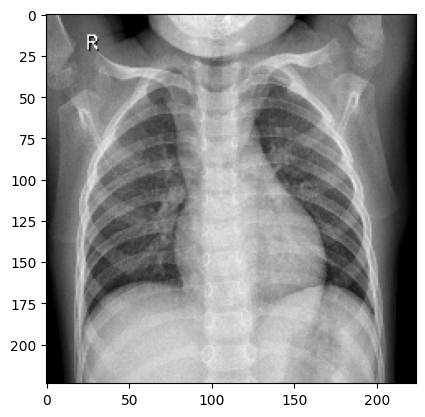

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input

img = tf.keras.preprocessing.image.load_img('/content/sample_data/covid19-chest-xray-image-dataset/dataset/normal/IM-0299-0001.jpeg', target_size=(224, 224))
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == [1]:
    print('Prediction: Normal')
else:
    print('Prediction: Corona')